# **Task 1**:

**Conduct hypothesis tests and calculate confidence intervals for the Heart Disease UCI dataset.
The Heart Disease UCI dataset contains information about patients' health factors and whether they have heart disease or not. It includes attributes such as age, sex, cholesterol levels, blood pressure, and the presence of heart disease. Your task is to conduct hypothesis tests and calculate confidence intervals to investigate relationships between variables and make statistical inferences about the dataset.**

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [21]:
# Step 1: Load the dataset into a Pandas Data Frame
df = pd.read_csv('/content/drive/MyDrive/Data Science Internship/week_2/Day_3/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


**Step 2**

**Perform exploratory data analysis (EDA) to understand the distribution of variables, identify potential relationships, and detect any outliers or missing values.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [24]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

<Axes: >

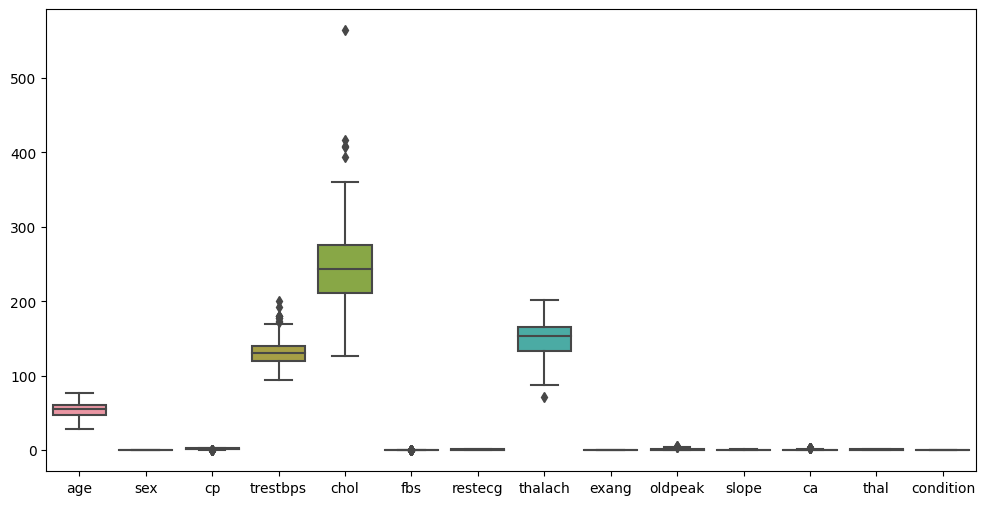

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']], ax=ax)


In [26]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]

# Print the outliers
print(outliers)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
79    67    0   2       115   564    0        2      160      0      1.6   
83    65    0   2       140   417    1        2      157      0      0.8   
180   63    0   3       150   407    0        2      154      0      4.0   
188   62    0   3       140   394    0        2      157      0      1.2   
238   56    0   3       134   409    0        2      150      1      1.9   

     slope  ca  thal  condition  
79       1   0     2          0  
83       0   1     0          0  
180      1   3     2          1  
188      1   0     0          0  
238      1   2     2          1  


0.08028475098000233


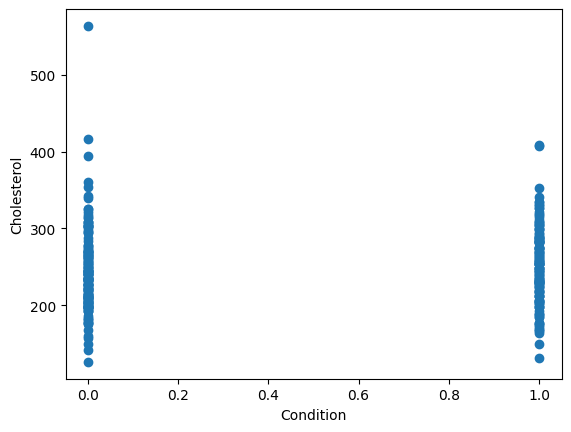

In [27]:
correlation=df['condition'].corr(df['chol'])
print(correlation)
# Step 2: Visualize the correlation between 'condition' and 'chol'
plt.scatter(df['condition'], df['chol'])
plt.xlabel('Condition')
plt.ylabel('Cholesterol')
plt.show()

# **Step 3-5**
**Formulate your hypothesis based on the research question you want to address. For example, you might want to test if there is a significant difference in cholesterol levels between patients with and without heart disease.**

In [28]:
# Import necessary libraries
from scipy.stats import ttest_ind

# Separate the data into two groups: with heart disease and without heart disease
heart_disease = df[df['condition'] == 1]['chol']
no_heart_disease = df[df['condition'] == 0]['chol']

# Perform the independent t-test
t_stat, p_value = ttest_ind(heart_disease, no_heart_disease)

# Interpret the results
if p_value < 0.05:
    print("The difference in cholesterol levels between patients with and without heart disease is statistically significant.")
else:
    print("There is no significant difference in cholesterol levels between patients with and without heart disease.")

# Print the test results
print("Independent t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


There is no significant difference in cholesterol levels between patients with and without heart disease.
Independent t-test results:
t-statistic: 1.3834015443480652
p-value: 0.16758776714742368


# **Step 6**

**Calculate confidence intervals for relevant variables to estimate the range within which the true population parameter lies. This will provide additional insights into the precision of your estimates**

In [29]:
# Assuming 'chol' is the column containing cholesterol levels in the DataFrame
chol_values = df['chol']

# Calculate the sample mean and standard deviation
sample_mean = np.mean(chol_values)
sample_std = np.std(chol_values, ddof=1)  # ddof=1 for sample standard deviation

# Calculate the sample size (number of data points)
sample_size = len(chol_values)

# Calculate the standard error of the mean
standard_error = sample_std / np.sqrt(sample_size)

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value from the t-distribution table
# For a 95% confidence level and n-1 degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate the confidence interval
lower_bound = sample_mean - critical_value * standard_error
upper_bound = sample_mean + critical_value * standard_error

# Print the confidence interval
print(f"95% Confidence Interval for Cholesterol Levels: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Confidence Interval for Cholesterol Levels: [241.41, 253.29]


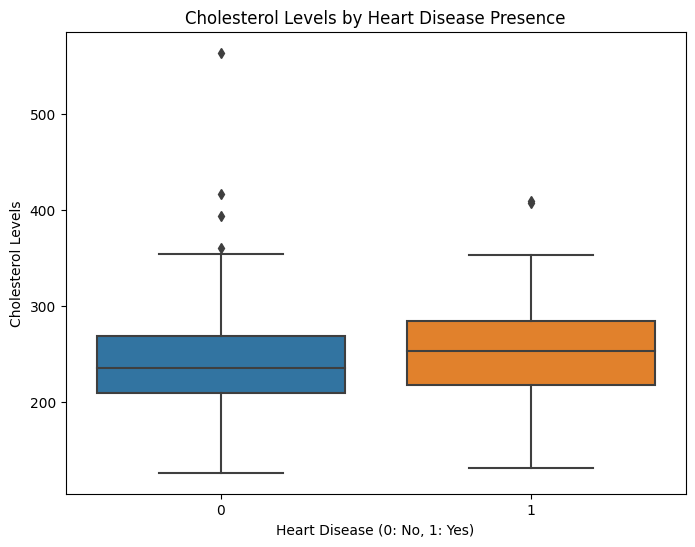

In [30]:
# Box plot to compare cholesterol levels between patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='chol', data=df)
plt.title("Cholesterol Levels by Heart Disease Presence")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Cholesterol Levels")
plt.show()

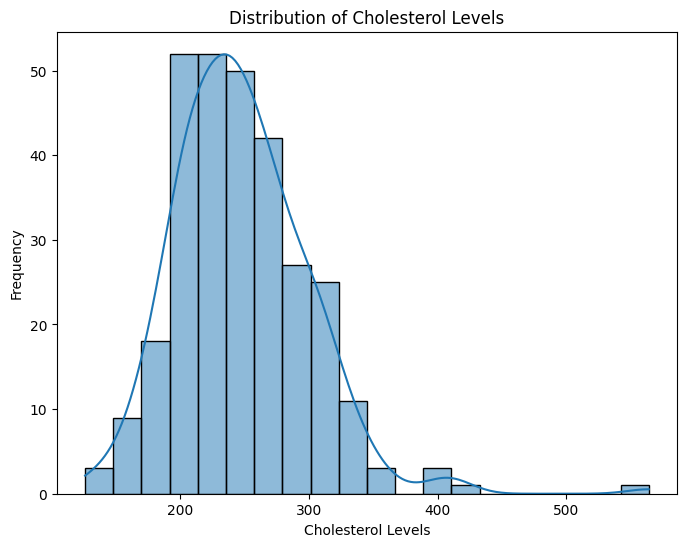

In [31]:
# Histogram plot for cholesterol levels
plt.figure(figsize=(8, 6))
sns.histplot(df['chol'], bins=20, kde=True)
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol Levels")
plt.ylabel("Frequency")
plt.show()
